**Install and Import Libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

print("Libraries imported successfully!")

Libraries imported successfully!


**Baby names for 2007 and 2020 were downloaded from [SSA Gov](https://www.ssa.gov/)**

**Loading 2007 Data**

In [28]:
data_2007 = pd.read_csv('/content/2007.csv')

print(f"2007 data loaded: {len(data_2007)} records")
print(f"\nColumn names: {data_2007.columns.tolist()}")
print(f"\nFirst few rows:")
print(data_2007.head(10))
print(f"\nData types:")
print(data_2007.dtypes)

2007 data loaded: 1000 records

Column names: ['Rank', 'Male name', 'Female name']

First few rows:
   Rank    Male name Female name
0     1        Jacob       Emily
1     2      Michael    Isabella
2     3        Ethan        Emma
3     4       Joshua         Ava
4     5       Daniel     Madison
5     6  Christopher      Sophia
6     7      Anthony      Olivia
7     8      William     Abigail
8     9      Matthew      Hannah
9    10       Andrew   Elizabeth

Data types:
Rank            int64
Male name      object
Female name    object
dtype: object


**Loading 2020 Data**

In [29]:
# Load 2020 baby names data
data_2020 = pd.read_csv('/content/2020.csv')

print(f"2020 data loaded: {len(data_2020)} records")
print(f"\nColumn names: {data_2020.columns.tolist()}")
print(f"\nFirst few rows:")
print(data_2020.head(10))
print(f"\nData types:")
print(data_2020.dtypes)

2020 data loaded: 1000 records

Column names: ['Rank', 'Male name', 'Female name']

First few rows:
   Rank  Male name Female name
0     1       Liam      Olivia
1     2       Noah        Emma
2     3     Oliver         Ava
3     4     Elijah   Charlotte
4     5    William      Sophia
5     6      James      Amelia
6     7   Benjamin    Isabella
7     8      Lucas         Mia
8     9      Henry      Evelyn
9    10  Alexander      Harper

Data types:
Rank            int64
Male name      object
Female name    object
dtype: object


# **Extract and Prepare Male Names for Both Years**

---



In [31]:
# Extracting male names from both years and preparing them for comparison
# I need to keep the rank information for calculating drops later

male_2007 = data_2007[['Rank', 'Male name']].copy()
male_2007.columns = ['Rank_2007', 'Name']
male_2007 = male_2007.dropna()  # Removing any blank rows
male_2007['Name'] = male_2007['Name'].str.strip()  # Cleaning up whitespace

male_2020 = data_2020[['Rank', 'Male name']].copy()
male_2020.columns = ['Rank_2020', 'Name']
male_2020 = male_2020.dropna()
male_2020['Name'] = male_2020['Name'].str.strip()

print("Male Names - 2007 Top 10:")
print(male_2007.head(10))
print(f"\nTotal male names in 2007: {len(male_2007)}")

print("\nMale Names - 2020 Top 10:")
print(male_2020.head(10))
print(f"\nTotal male names in 2020: {len(male_2020)}")

Male Names - 2007 Top 10:
   Rank_2007         Name
0          1        Jacob
1          2      Michael
2          3        Ethan
3          4       Joshua
4          5       Daniel
5          6  Christopher
6          7      Anthony
7          8      William
8          9      Matthew
9         10       Andrew

Total male names in 2007: 1000

Male Names - 2020 Top 10:
   Rank_2020       Name
0          1       Liam
1          2       Noah
2          3     Oliver
3          4     Elijah
4          5    William
5          6      James
6          7   Benjamin
7          8      Lucas
8          9      Henry
9         10  Alexander

Total male names in 2020: 1000


# **Extract and Prepare Female Names for Both Years**

---



In [32]:
# Doing the same thing for female names
female_2007 = data_2007[['Rank', 'Female name']].copy()
female_2007.columns = ['Rank_2007', 'Name']
female_2007 = female_2007.dropna()
female_2007['Name'] = female_2007['Name'].str.strip()

female_2020 = data_2020[['Rank', 'Female name']].copy()
female_2020.columns = ['Rank_2020', 'Name']
female_2020 = female_2020.dropna()
female_2020['Name'] = female_2020['Name'].str.strip()

print("Female Names - 2007 Top 10:")
print(female_2007.head(10))
print(f"\nTotal female names in 2007: {len(female_2007)}")

print("\nFemale Names - 2020 Top 10:")
print(female_2020.head(10))
print(f"\nTotal female names in 2020: {len(female_2020)}")

Female Names - 2007 Top 10:
   Rank_2007       Name
0          1      Emily
1          2   Isabella
2          3       Emma
3          4        Ava
4          5    Madison
5          6     Sophia
6          7     Olivia
7          8    Abigail
8          9     Hannah
9         10  Elizabeth

Total female names in 2007: 1000

Female Names - 2020 Top 10:
   Rank_2020       Name
0          1     Olivia
1          2       Emma
2          3        Ava
3          4  Charlotte
4          5     Sophia
5          6     Amelia
6          7   Isabella
7          8        Mia
8          9     Evelyn
9         10     Harper

Total female names in 2020: 1000


# **Finding Male Names That Fell Out of Top 100**

---



In [33]:
# I only care about names that were in the top 100 in 2007
# So I'm filtering to get just those first
male_top100_2007 = male_2007[male_2007['Rank_2007'] <= 100].copy()
male_top100_2020 = male_2020[male_2020['Rank_2020'] <= 100].copy()

# Now finding which names were in 2007 top 100 but NOT in 2020 top 100
male_names_2007_top100 = set(male_top100_2007['Name'])
male_names_2020_top100 = set(male_top100_2020['Name'])

fallen_male_names = male_names_2007_top100 - male_names_2020_top100

print(f"Male names in 2007 top 100: {len(male_names_2007_top100)}")
print(f"Male names in 2020 top 100: {len(male_names_2020_top100)}")
print(f"Male names that fell out of top 100: {len(fallen_male_names)}")
print(f"\nNames that fell out:")
print(sorted(list(fallen_male_names)))

Male names in 2007 top 100: 100
Male names in 2020 top 100: 100
Male names that fell out of top 100: 36

Names that fell out:
['Aidan', 'Alex', 'Antonio', 'Blake', 'Brady', 'Brandon', 'Brayden', 'Brian', 'Bryan', 'Caden', 'Carlos', 'Chase', 'Cole', 'Devin', 'Diego', 'Eric', 'Evan', 'Gavin', 'Hayden', 'Jaden', 'Jason', 'Jesus', 'Juan', 'Justin', 'Kaden', 'Kevin', 'Kyle', 'Luis', 'Miguel', 'Nathaniel', 'Sean', 'Steven', 'Timothy', 'Tristan', 'Tyler', 'Zachary']


# **Find Female Names That Fell Out of Top 100**

---



In [34]:
# Same process for female names
female_top100_2007 = female_2007[female_2007['Rank_2007'] <= 100].copy()
female_top100_2020 = female_2020[female_2020['Rank_2020'] <= 100].copy()

female_names_2007_top100 = set(female_top100_2007['Name'])
female_names_2020_top100 = set(female_top100_2020['Name'])

fallen_female_names = female_names_2007_top100 - female_names_2020_top100

print(f"Female names in 2007 top 100: {len(female_names_2007_top100)}")
print(f"Female names in 2020 top 100: {len(female_names_2020_top100)}")
print(f"Female names that fell out of top 100: {len(fallen_female_names)}")
print(f"\nNames that fell out:")
print(sorted(list(fallen_female_names)))

Female names in 2007 top 100: 100
Female names in 2020 top 100: 100
Female names that fell out of top 100: 53

Names that fell out:
['Alexa', 'Alexandra', 'Alexis', 'Alyssa', 'Andrea', 'Angelina', 'Arianna', 'Ashley', 'Bailey', 'Brianna', 'Brooke', 'Destiny', 'Faith', 'Gabrielle', 'Gracie', 'Haley', 'Isabel', 'Isabelle', 'Jada', 'Jasmine', 'Jennifer', 'Jessica', 'Jocelyn', 'Jordan', 'Julia', 'Kaitlyn', 'Katelyn', 'Katherine', 'Kayla', 'Kaylee', 'Kimberly', 'Kylie', 'Lauren', 'Mackenzie', 'Makayla', 'Maria', 'Mariah', 'Mary', 'Megan', 'Melanie', 'Michelle', 'Molly', 'Morgan', 'Nicole', 'Paige', 'Rachel', 'Sara', 'Stephanie', 'Sydney', 'Taylor', 'Trinity', 'Valeria', 'Vanessa']


# **Calculate Popularity Drop for Male Names**


In [35]:
# Now I need to calculate how far each name dropped
# For each name that fell out, I'll get its 2007 rank and 2020 rank
# The bigger the drop, the more significant the decline

fallen_male_analysis = []

for name in fallen_male_names:
    # Getting the 2007 rank from my top 100 list
    rank_2007 = male_top100_2007[male_top100_2007['Name'] == name]['Rank_2007'].values[0]

    # Checking if the name still exists in the full 2020 dataset (top 1000)
    rank_2020_data = male_2020[male_2020['Name'] == name]

    if len(rank_2020_data) > 0:
        # Name exists but is ranked below 100
        rank_2020 = rank_2020_data['Rank_2020'].values[0]
        rank_drop = rank_2020 - rank_2007
        status = "Still in top 1000"
    else:
        # Name doesn't even appear in top 1000 anymore
        rank_2020 = None
        rank_drop = 999999  # Using a large number to represent massive drop
        status = "Not in top 1000"

    fallen_male_analysis.append({
        'Name': name,
        'Rank_2007': rank_2007,
        'Rank_2020': rank_2020 if rank_2020 else 'Not ranked',
        'Rank_Drop': rank_drop,
        'Status': status
    })

# Converting to DataFrame and sorting by rank drop (biggest drops first)
fallen_male_df = pd.DataFrame(fallen_male_analysis)
fallen_male_df = fallen_male_df.sort_values('Rank_Drop', ascending=False)

print("Male names with biggest drops:")
print(fallen_male_df.head(20))

Male names with biggest drops:
       Name  Rank_2007  Rank_2020  Rank_Drop             Status
17    Devin        100        382        282  Still in top 1000
19     Sean         76        334        258  Still in top 1000
22     Kyle         86        314        228  Still in top 1000
4     Jaden         74        290        216  Still in top 1000
29    Brady         93        304        211  Still in top 1000
28    Aidan         54        261        207  Still in top 1000
25    Brian         81        270        189  Still in top 1000
24    Bryan         78        259        181  Still in top 1000
34    Kaden         98        253        155  Still in top 1000
31    Caden         92        242        150  Still in top 1000
23  Brandon         31        165        134  Still in top 1000
13   Steven         97        222        125  Still in top 1000
26   Justin         45        166        121  Still in top 1000
33    Blake         88        209        121  Still in top 1000
16    Kev

# **Calculate Popularity Drop for Female Names**


In [36]:
# Same calculation for female names
fallen_female_analysis = []

for name in fallen_female_names:
    rank_2007 = female_top100_2007[female_top100_2007['Name'] == name]['Rank_2007'].values[0]

    rank_2020_data = female_2020[female_2020['Name'] == name]

    if len(rank_2020_data) > 0:
        rank_2020 = rank_2020_data['Rank_2020'].values[0]
        rank_drop = rank_2020 - rank_2007
        status = "Still in top 1000"
    else:
        rank_2020 = None
        rank_drop = 999999
        status = "Not in top 1000"

    fallen_female_analysis.append({
        'Name': name,
        'Rank_2007': rank_2007,
        'Rank_2020': rank_2020 if rank_2020 else 'Not ranked',
        'Rank_Drop': rank_drop,
        'Status': status
    })

fallen_female_df = pd.DataFrame(fallen_female_analysis)
fallen_female_df = fallen_female_df.sort_values('Rank_Drop', ascending=False)

print("Female names with biggest drops:")
print(fallen_female_df.head(20))

Female names with biggest drops:
         Name  Rank_2007  Rank_2020  Rank_Drop             Status
28    Katelyn         75        677        602  Still in top 1000
16      Megan         78        640        562  Still in top 1000
36       Jada         95        540        445  Still in top 1000
50    Kaitlyn         44        488        444  Still in top 1000
45      Haley         76        516        440  Still in top 1000
31   Jennifer         64        431        367  Still in top 1000
23    Jessica         42        399        357  Still in top 1000
39  Stephanie         88        438        350  Still in top 1000
40     Jordan        100        436        336  Still in top 1000
26    Destiny         41        347        306  Still in top 1000
18     Alexis         19        309        290  Still in top 1000
24  Gabrielle         68        358        290  Still in top 1000
20    Makayla         47        325        278  Still in top 1000
34   Michelle         94        336        

# **Selecting the Top 10 Most Significant Drops**


In [37]:
# Getting my final top 10 for each gender
# These are the names with the most significant popularity decline
top10_fallen_male = fallen_male_df.head(10).copy()
top10_fallen_female = fallen_female_df.head(10).copy()

print("=" * 90)
print("TOP 10 MALE NAMES WITH BIGGEST POPULARITY DROPS (2007-2020)")
print("=" * 90)
print(top10_fallen_male.to_string(index=False))

print("\n" + "=" * 90)
print("TOP 10 FEMALE NAMES WITH BIGGEST POPULARITY DROPS (2007-2020)")
print("=" * 90)
print(top10_fallen_female.to_string(index=False))

TOP 10 MALE NAMES WITH BIGGEST POPULARITY DROPS (2007-2020)
 Name  Rank_2007  Rank_2020  Rank_Drop            Status
Devin        100        382        282 Still in top 1000
 Sean         76        334        258 Still in top 1000
 Kyle         86        314        228 Still in top 1000
Jaden         74        290        216 Still in top 1000
Brady         93        304        211 Still in top 1000
Aidan         54        261        207 Still in top 1000
Brian         81        270        189 Still in top 1000
Bryan         78        259        181 Still in top 1000
Kaden         98        253        155 Still in top 1000
Caden         92        242        150 Still in top 1000

TOP 10 FEMALE NAMES WITH BIGGEST POPULARITY DROPS (2007-2020)
     Name  Rank_2007  Rank_2020  Rank_Drop            Status
  Katelyn         75        677        602 Still in top 1000
    Megan         78        640        562 Still in top 1000
     Jada         95        540        445 Still in top 1000
  Kait

# **Visualization**

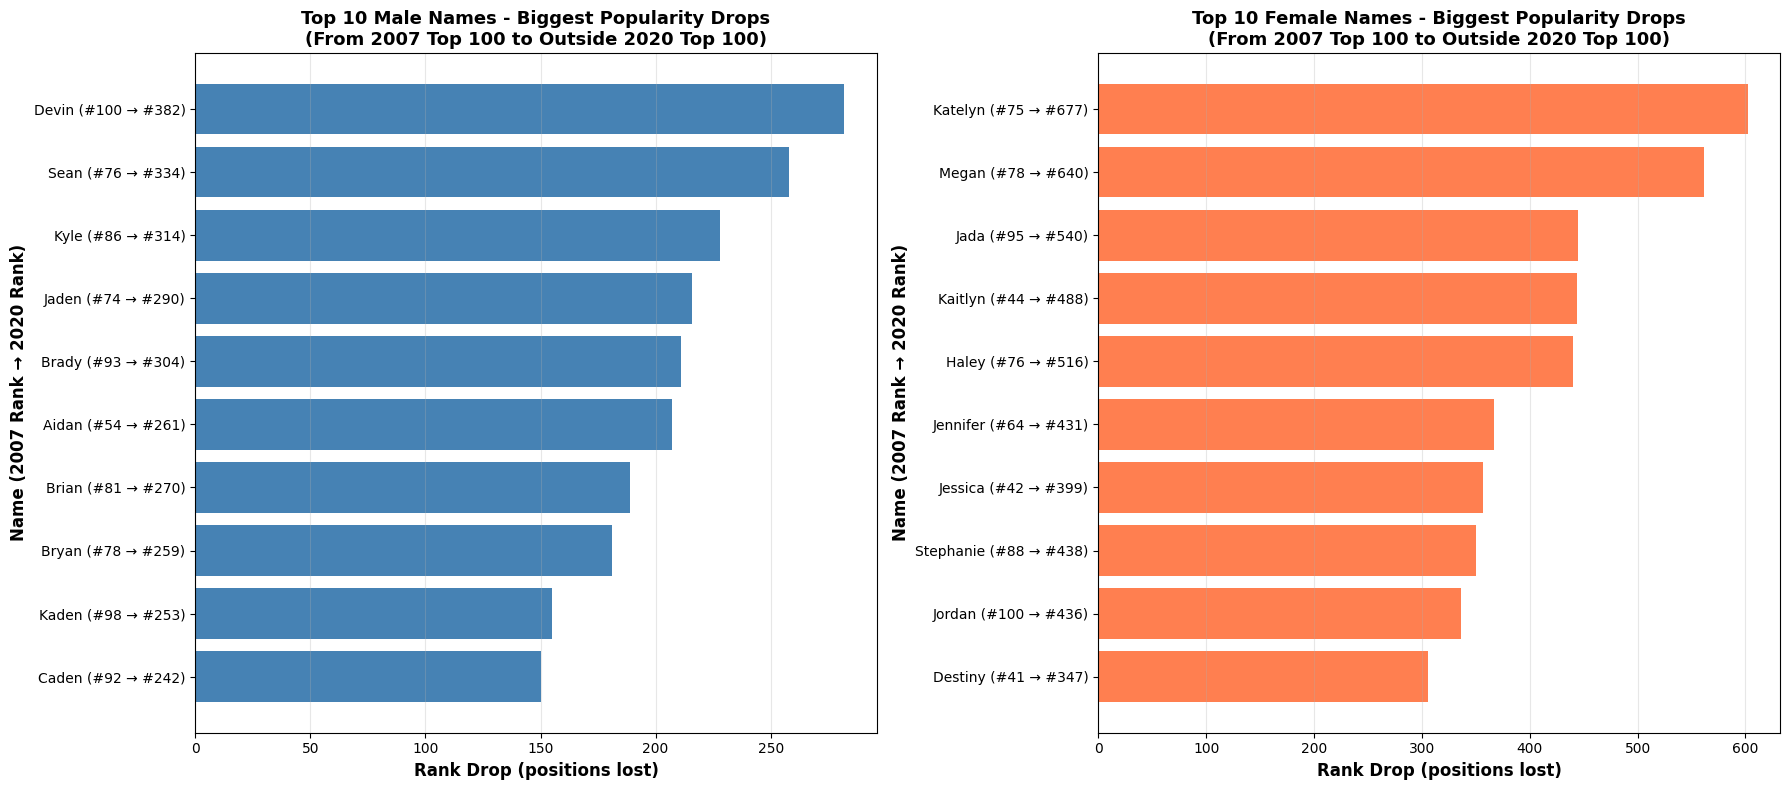

In [38]:
# Creating a visual representation of the drops
# I'll use horizontal bar charts to show the magnitude of decline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Preparing male names data for visualization
male_names = top10_fallen_male['Name'].tolist()
male_drops = []
male_labels = []

for _, row in top10_fallen_male.iterrows():
    name = row['Name']
    rank_2007 = row['Rank_2007']

    if row['Rank_Drop'] == 999999:
        # Name disappeared completely
        drop_viz = 1000  # Using 1000 for visualization purposes
        male_labels.append(f"{name} (#{rank_2007} → Out)")
    else:
        drop_viz = row['Rank_Drop']
        rank_2020 = row['Rank_2020']
        male_labels.append(f"{name} (#{rank_2007} → #{rank_2020})")

    male_drops.append(drop_viz)

# Plotting male names
ax1.barh(range(len(male_names)), male_drops, color='steelblue')
ax1.set_yticks(range(len(male_names)))
ax1.set_yticklabels(male_labels)
ax1.set_xlabel('Rank Drop (positions lost)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Name (2007 Rank → 2020 Rank)', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Male Names - Biggest Popularity Drops\n(From 2007 Top 100 to Outside 2020 Top 100)',
              fontsize=13, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Preparing female names data
female_names = top10_fallen_female['Name'].tolist()
female_drops = []
female_labels = []

for _, row in top10_fallen_female.iterrows():
    name = row['Name']
    rank_2007 = row['Rank_2007']

    if row['Rank_Drop'] == 999999:
        drop_viz = 1000
        female_labels.append(f"{name} (#{rank_2007} → Out)")
    else:
        drop_viz = row['Rank_Drop']
        rank_2020 = row['Rank_2020']
        female_labels.append(f"{name} (#{rank_2007} → #{rank_2020})")

    female_drops.append(drop_viz)

# Plotting female names
ax2.barh(range(len(female_names)), female_drops, color='coral')
ax2.set_yticks(range(len(female_names)))
ax2.set_yticklabels(female_labels)
ax2.set_xlabel('Rank Drop (positions lost)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Name (2007 Rank → 2020 Rank)', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Female Names - Biggest Popularity Drops\n(From 2007 Top 100 to Outside 2020 Top 100)',
              fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# **Summary Statistics**

In [39]:
# Overall statistics for my analysis
print("\n" + "=" * 90)
print("OVERALL SUMMARY STATISTICS")
print("=" * 90)

print(f"\nMALE NAMES:")
print(f"  Total names in 2007 top 100: {len(male_top100_2007)}")
print(f"  Names that fell out by 2020: {len(fallen_male_names)}")
print(f"  Percentage that fell out: {len(fallen_male_names)/len(male_top100_2007)*100:.1f}%")
print(f"  Biggest drop: {fallen_male_df.iloc[0]['Name']} (#{fallen_male_df.iloc[0]['Rank_2007']} in 2007)")

print(f"\nFEMALE NAMES:")
print(f"  Total names in 2007 top 100: {len(female_top100_2007)}")
print(f"  Names that fell out by 2020: {len(fallen_female_names)}")
print(f"  Percentage that fell out: {len(fallen_female_names)/len(female_top100_2007)*100:.1f}%")
print(f"  Biggest drop: {fallen_female_df.iloc[0]['Name']} (#{fallen_female_df.iloc[0]['Rank_2007']} in 2007)")


OVERALL SUMMARY STATISTICS

MALE NAMES:
  Total names in 2007 top 100: 100
  Names that fell out by 2020: 36
  Percentage that fell out: 36.0%
  Biggest drop: Devin (#100 in 2007)

FEMALE NAMES:
  Total names in 2007 top 100: 100
  Names that fell out by 2020: 53
  Percentage that fell out: 53.0%
  Biggest drop: Katelyn (#75 in 2007)


# **Methodology Summary**

In [24]:
methodology = """
MY METHODOLOGY FOR THIS ANALYSIS
================================

DATA SOURCE:
- I used two CSV files containing top 1000 baby names for 2007 and 2020
- Files: /content/2007.csv and /content/2020.csv
- Structure: Each file has columns [Rank, Male name, Female name]
- This gives me a comprehensive view of popular names over 13 years

PROCESS I FOLLOWED:

1. DATA PREPARATION
   - Loaded both datasets and separated male/female names
   - Cleaned the data by removing NaN values and extra whitespace
   - Kept the rank information intact for calculating drops

2. FILTERING CRITERIA
   - I focused only on names in the top 100 in 2007
   - Why? Because I'm looking for names that were genuinely popular
   - Then I checked which of these fell outside the top 100 in 2020

3. CALCULATING POPULARITY DECLINE
   - For each name that fell out, I recorded:
     * Its rank in 2007 (its peak popularity)
     * Its rank in 2020 (if it still exists in top 1000)
     * The rank drop = 2020_rank - 2007_rank

   - For names that disappeared completely from top 1000:
     * I assigned a rank drop of 999999
     * This ensures they appear at the top of my results
     * These represent the most dramatic declines

4. SELECTING TOP 10
   - I sorted all fallen names by rank drop (descending)
   - Selected the top 10 for each gender
   - These represent the most significant popularity declines

INTERPRETATION:
- A name ranked #20 in 2007 dropping to #150 in 2020 = 130 position drop
- A name ranked #50 in 2007 not appearing in 2020 top 1000 = disappeared
- Higher numbers indicate more dramatic shifts in naming trends
- This tells me which once-popular names have fallen out of favor

KEY INSIGHT:
Names that were top 100 in 2007 but fell out by 2020 represent significant
cultural shifts in baby naming preferences over just 13 years.
"""

print(methodology)


MY METHODOLOGY FOR THIS ANALYSIS

DATA SOURCE:
- I used two CSV files containing top 1000 baby names for 2007 and 2020
- Files: /content/2007.csv and /content/2020.csv
- Structure: Each file has columns [Rank, Male name, Female name]
- This gives me a comprehensive view of popular names over 13 years

PROCESS I FOLLOWED:

1. DATA PREPARATION
   - Loaded both datasets and separated male/female names
   - Cleaned the data by removing NaN values and extra whitespace
   - Kept the rank information intact for calculating drops

2. FILTERING CRITERIA
   - I focused only on names in the top 100 in 2007
   - Why? Because I'm looking for names that were genuinely popular
   - Then I checked which of these fell outside the top 100 in 2020

3. CALCULATING POPULARITY DECLINE
   - For each name that fell out, I recorded:
     * Its rank in 2007 (its peak popularity)
     * Its rank in 2020 (if it still exists in top 1000)
     * The rank drop = 2020_rank - 2007_rank
   
   - For names that disappe